Note: Please "pip install wordcloud".

In [13]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, text
from os import path
from pathlib import Path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

engine = create_engine(f"sqlite:///Resources/Theme Park Incidents SQL Lite.sqlite")

In [14]:
# Load in the dataframe
incident_data = pd.read_sql("Combined_Table", engine)

incident_data.head()

,Incident_ID,Company,Incident_Date,Ride_Name,Theme_Park,Age,Gender,Description,Pre_Existing_Condition,Passed_Away,Before_During_After,Lat_Long,Lat,Long
0,1,Universal,12/29/2001,Caro-Seuss-el,Islands of Adventure,52,F,broken arm,N,N,Not Specified,"28.473019479946934, -81.46912794980811",28.473019,-81.469128
1,2,Disney World,1/4/2002,The Twilight Zone Tower of Terror,Hollywood Studios,47,F,"anxiety & claustrophobia, atrial fibrilation",N,N,Not Specified,"28.360382462440796, -81.5598948783851",28.360382,-81.559895
2,3,Universal,2/10/2002,Dudley Do Rights Ripsaw Falls,Islands of Adventure,55,F,complained of lower back pain.,N,N,Not Specified,"28.469371941346193, -81.4714516228227",28.469372,-81.471452
3,4,Universal,3/22/2002,E.T Adventure,Universal Studios,13,M,injured right foot.,N,N,Not Specified,"28.477695013144068, -81.46610247864369",28.477695,-81.466102
4,5,Disney World,3/29/2002,Surf Pool,Typhoon Lagoon,16,F,c/o neck pain,N,N,Not Specified,"28.366195077472007, -81.5295786721928",28.366195,-81.529579


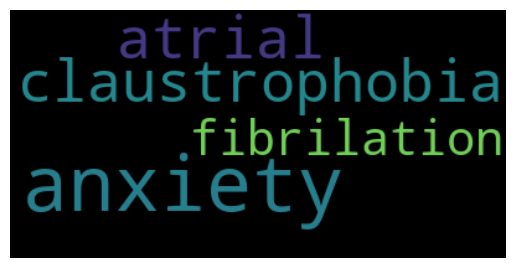

In [15]:
# Start with one review:
text = incident_data.Description[1]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
text = " ".join(incident for incident in incident_data.Description)

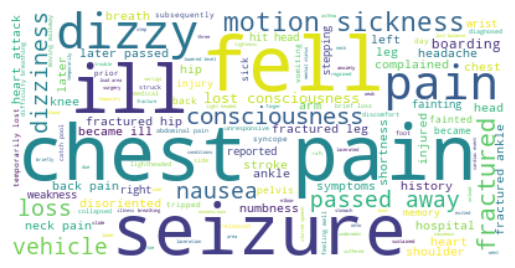

In [17]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["ride", "riding", "attraction", "existing", "condition", "pre", "exiting", "experienced", "felt", "health", "guest"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [11]:
wordcloud.to_file("first_wordcloud.png")